# periodisches signal im zeitbereich

## allgemeine harmonische Sinusschwingung: 
$${y(t)= \hat{y} ⋅ sin(\omega⋅t + \phi_0)}$$ oder $${y(t)=\hat{y}⋅sin(2{\pi}f⋅t+φ_0)}$$

$\hat{y} : Amplitude$
$$ $$
${\omega: Kreisfrequenz}$ in  ${1 \over s}$
$$ $$
${f: Frequenz}$ in ${1 \over s}$;  Periodendauer Ts = ${1 \over f}$ in s
$$ $$
${\phi}_0: Phasenwinkel$

<IPython.core.display.Javascript object>


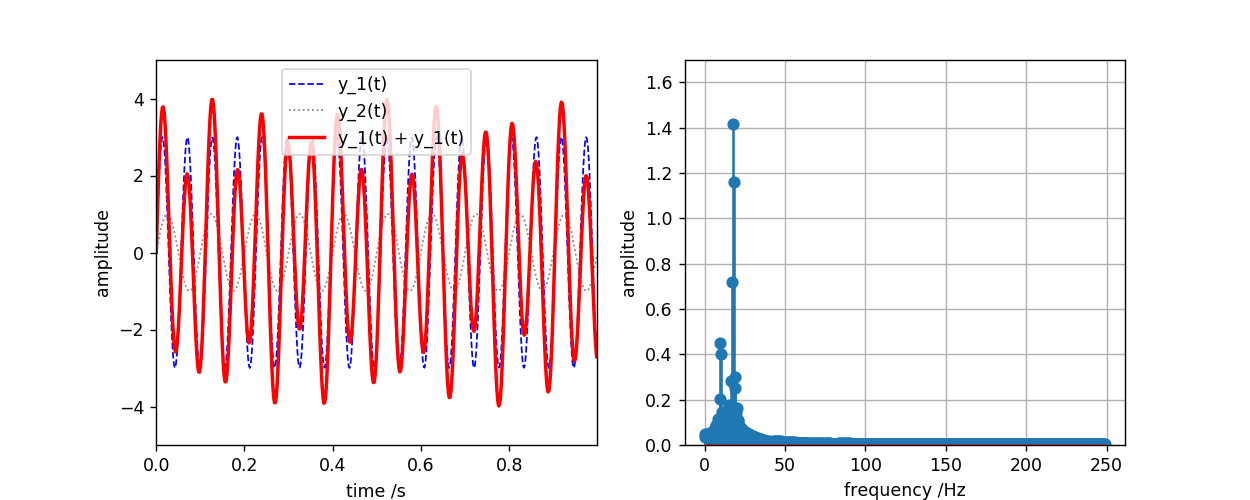

interactive(children=(FloatSlider(value=1.0, description='$\\hat{y}$_1:', max=5.0), FloatSlider(value=1.0, des…

In [82]:
# resourcen
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

#set backend for interactive toolbar
%matplotlib nbagg 

#--------------------------------------------------------------------------------------------------------------
# darstellung einer harmonischen Schwingung (Sinusschwingung) mit 2 Frequenzen
#
# x_range: 0 ... +1s resolution: 1/500 = 0.002
# interactive sliders for amplitude, frequency_1, frequency_2 and phase
#
# matplotlib supports writing greek letters
#     --> https://matplotlib.org/tutorials/text/mathtext.html?highlight=greek
#
# matplotlib renders an interactive toolbar {home|forward|backward|move_pan|zoom-in|print} 
#     --> https://matplotlib.org/3.1.1/users/navigation_toolbar.html
#     --> the backend for this toolbar is startet with %matplotlib nbagg!  
#              the recommendend %matplotlib notebook  does not work

fs = 500                                                 # Schrittweite für Abtastung
time = np.arange(0.0, 1.0, 1/fs)                         # zeitvektor 0...5 s, Schrittweite 1/fs
fig1, (ax1, ax2) = plt.subplots(1,2,figsize = (10,4))               # figur zeichnen
#plt.suptitle("allgemeine Sinusschwingung im Zeitbereich") # title setzen

ax1.set_title("zeitbereich")
ax2.set_title("frequenzbereich")

#fig2, ax2 = plt.subplots(1,figsize = (8,4))               # figur zeichnen
#plt.suptitle("FFT") # title setzen

def update_plot(amp_1, amp_2, freq_1, freq_2, phase_1, phase_2):

    #plotting sinus signals to figure 1
    #
    ax1.clear()   
    y_1  = amp_1 * np.sin(2* np.pi * freq_1* time + phase_1)
    y_2  = amp_2 * np.sin(2* np.pi * freq_2* time + phase_2)
    y = y_1 + y_2
    
    ax1.plot(time,y_1, linewidth = 1, linestyle='--', color = 'b', label='y_1(t)')
    ax1.plot(time,y_2, linewidth = 1, linestyle='dotted', color = '0.5', label='y_2(t)')
    ax1.plot(time , y, linewidth = 2, linestyle='-', color = 'r', label = 'y_1(t) + y_1(t)')
    
    ax1.set_xlim(time[0], time[-1])
    ax1.set_xlabel("time /s")
    ax1.set_ylim(-5, 5)
    ax1.set_ylabel("amplitude")
    ax1.legend(loc='upper center')
    plt.grid(True)
    #plotting fft of sum signal to figure 2
    #
    ax2.clear()
    #
    # fft mit numpy routinen berechnen
    #
    # calculate discrete fourier transform of given signal
    fft_y = np.fft.fft(y,1024)
    #
    # number of points of the fft-signal
    # np.arange(0.0, 1.0 , 1/fs)
    n = len(fft_y)
    freq = np.fft.fftfreq(n, 1/fs)
    #
    # select ineresting part 0 .. n
    # shift the zero-frequency component to the center of the spectrum.
    Y1_shift = np.fft.fftshift(fft_y)
    F1_shift = np.fft.fftshift(freq)  #Return the Discrete Fourier Transform sample frequencies.
    #
    # calc the index of the zero point
    #
    iZero = int(np.ceil(n/2.0))
    #
    # get the amplitudes and frequencies from 0 ... n/2
    Y1_pos = Y1_shift[iZero:-1]
    F1_pos = F1_shift[iZero:-1]
    #
    # normalize amplitude with (2* 1/n)
    #    
    amplitude = 2*1/n * np.abs(Y1_pos)
    ax2.stem(F1_pos, amplitude, use_line_collection ='True')
    #ax2.stem(np.fft.fftfreq(n,1/fs),fft_y , use_line_collection ='True')
    #ax2.stem(F1_shift,Y1_shift, use_line_collection ='True')
    ax2.set_xlabel("frequency /Hz")
    ax2.set_ylabel("amplitude")
    ax2.set_ylim(0,(np.max(amplitude)*1.2))
    plt.grid(True)    
    plt.show()
    plt.draw()
    

amp_1 = widgets.FloatSlider(min=0, max=5, value=1, description="$\hat{y}$_1:")
freq_1 = widgets.FloatSlider(min=0, max=50, value=10, description="$f$_1: in Hz")
phase_1 = widgets.FloatSlider(min=0, max=180, value=0, description='$\phi$_1: in °')

amp_2 = widgets.FloatSlider(min=0, max=5, value=1, description="$\hat{y}$_2:")
freq_2 = widgets.FloatSlider(min=0, max=50, value=10, description="$f$_2: in Hz")
phase_2 = widgets.FloatSlider(min=0, max=180, value=0, description='$\phi$_2: in °')

widgets.interactive(update_plot, amp_1=amp_1, freq_1=freq_1, phase_1=phase_1, amp_2=amp_2, freq_2=freq_2, phase_2=phase_2)
#widgets.HBox([widgets.VBox([amp_1,freq_1,phase_1]), widgets.VBox([amp_2,freq_2,phase_2])])